<a href="https://colab.research.google.com/github/malcolmlett/ml-learning/blob/main/Learning_visualisations_v18_oscillations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ideas to try:
* LR just on edge of being too high
  -> use PCA plot
* Ravine problem
* Small batch training
* Inbalanced dataset

In [1]:
# Install Training Instrumentation Toolkit
# (locked to specific git revision so this notebook always works)
import os
import sys
if not os.path.isdir('training-instrumentation-toolkit'):
  !git clone https://github.com/malcolmlett/training-instrumentation-toolkit.git
  !cd training-instrumentation-toolkit && git checkout 4c46b9f
sys.path.append('training-instrumentation-toolkit')

# Imports
import train_instrumentation as tinstr
import train_explainer as texpl
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
import matplotlib.ticker as mticker
import sklearn

# Prefer consistent behaviour
tf.config.experimental.enable_op_determinism()

Cloning into 'training-instrumentation-toolkit'...
remote: Enumerating objects: 1400, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 1400 (delta 88), reused 54 (delta 25), pack-reused 1239 (from 1)
Receiving objects: 100% (1400/1400), 112.67 MiB | 12.00 MiB/s, done.
Resolving deltas: 100% (837/837), done.
Note: switching to '4c46b9f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4c46b9f Bug fix for time-tracking when running with `tf.con

## Learning Rate Issues

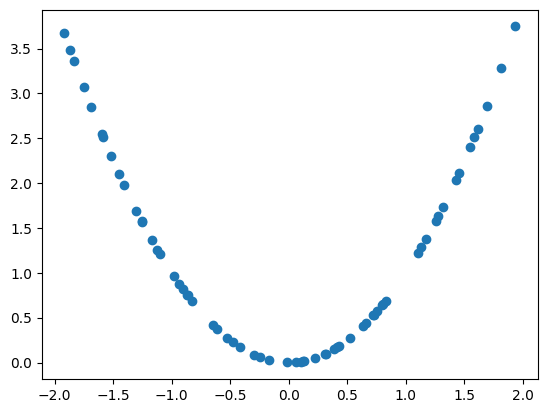

In [85]:
def polynomial_dataset():
  x = np.linspace(start=-2, stop=2, num=64*500)
  y = x**2
  dataset = tf.data.Dataset.from_tensor_slices((x, y))
  dataset = dataset.shuffle(buffer_size=dataset.cardinality(), seed=1, reshuffle_each_iteration=True).batch(64)
  return dataset

batch = next(iter(polynomial_dataset()))
plt.scatter(batch[0], batch[1])
plt.show()

In [112]:
def regression_model():
    input = tf.keras.Input(shape=(1,), name="input")
    x = layers.Dense(5, activation='tanh', name='dense1')(input)
    x = layers.Dense(5, activation='tanh', name='dense2')(x)
    x = layers.Dense(1, activation='linear', name='dense3')(x)
    return tf.keras.Model(input, x)

# uncomment to see summary
#regression_model().summary()

In [120]:
# with good learning rate
tf.keras.utils.set_random_seed(1)
model = regression_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss='mse')
dataset = polynomial_dataset()
history = tinstr.fit(model, dataset, epochs=20, callbacks=[tinstr.HistoryStats(per_step=True)])

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4586
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0803
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0174
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0087
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0065
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0047
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0030
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0027
Epoch 14/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025
Epoch 15/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

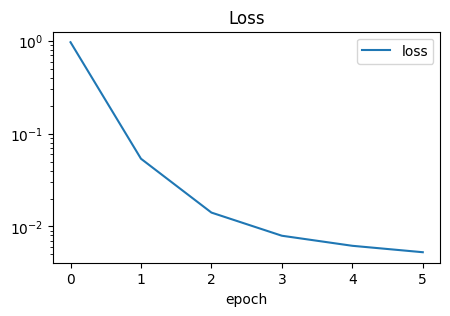

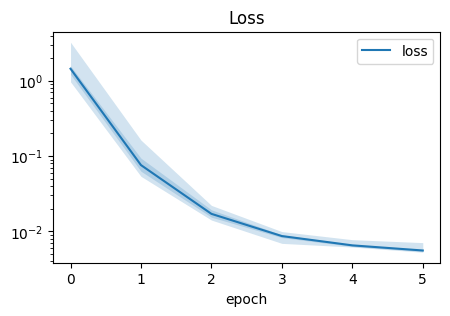

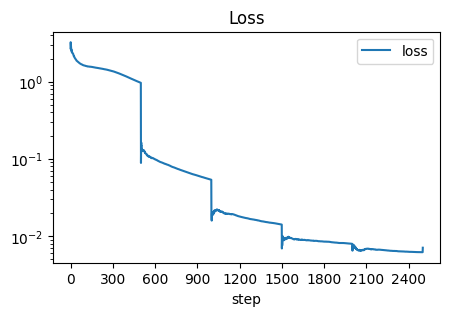

In [121]:
# plot just the first few epochs - with varying levels of detail
tinstr.plot_train_history(history, iterations=range(0,6), show_loss_percentiles=False)
tinstr.plot_train_history(history, iterations=range(0,6))
tinstr.plot_train_history(history, iterations=range(0,5*500+1), per_step=True)

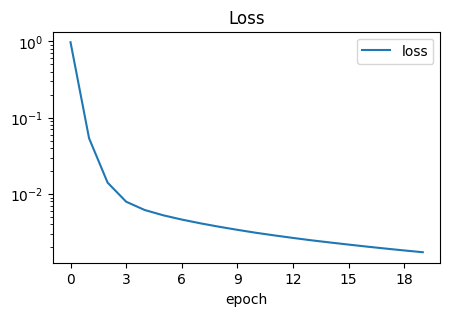

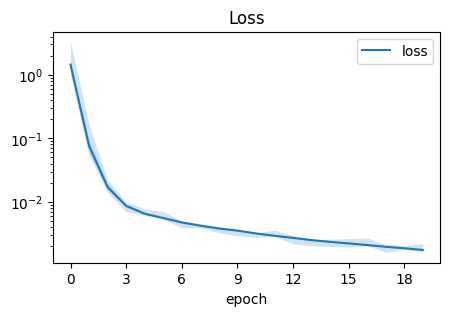

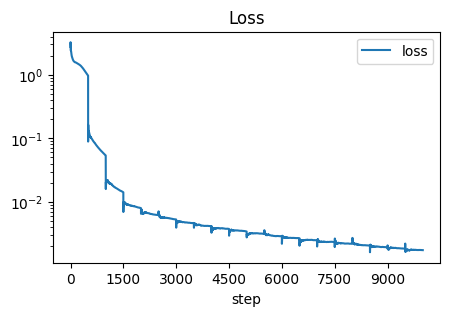

In [122]:
# plot with varying levels of detail
tinstr.plot_train_history(history, show_loss_percentiles=False)
tinstr.plot_train_history(history, show_loss_percentiles=True)
tinstr.plot_train_history(history, per_step=True)

In [116]:
# with learning rate just a little bit too high
tf.keras.utils.set_random_seed(1)
model = regression_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), loss='mse')
dataset = polynomial_dataset()
history = tinstr.fit(model, dataset, epochs=20, callbacks=[tinstr.HistoryStats(per_step=True)])

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4747
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0142
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0035
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5065e-04
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.9736e-04
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0090e-04
Epoch 14/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9766e-04
Epoch 15/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 

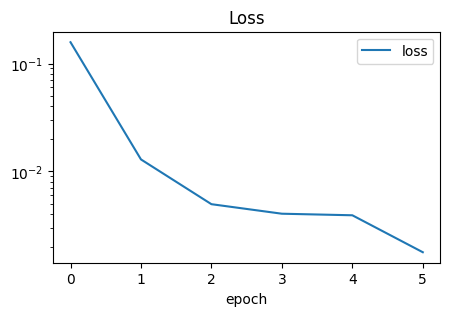

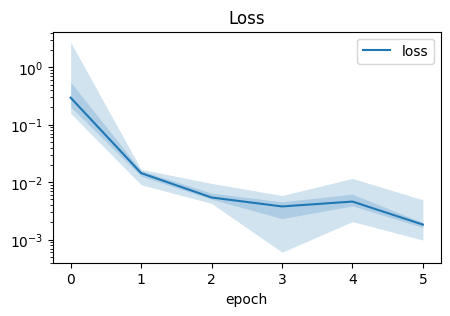

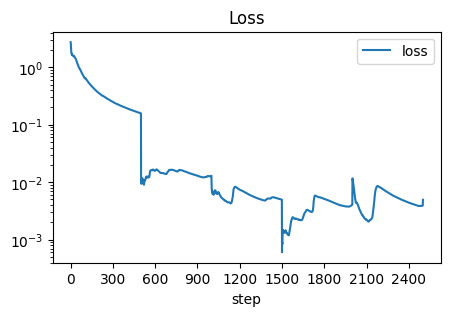

In [119]:
# plot just the first few epochs - with varying levels of detail
tinstr.plot_train_history(history, iterations=range(0,6), show_loss_percentiles=False)
tinstr.plot_train_history(history, iterations=range(0,6))
tinstr.plot_train_history(history, iterations=range(0,5*500+1), per_step=True)

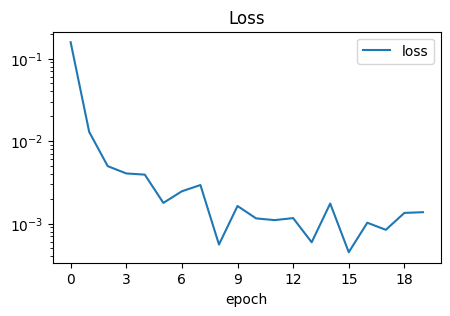

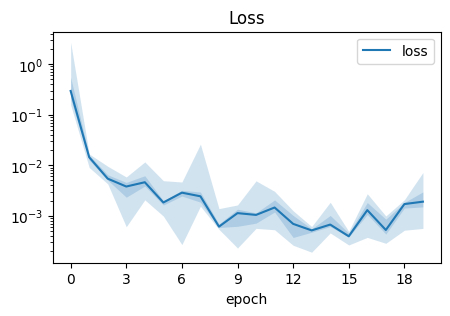

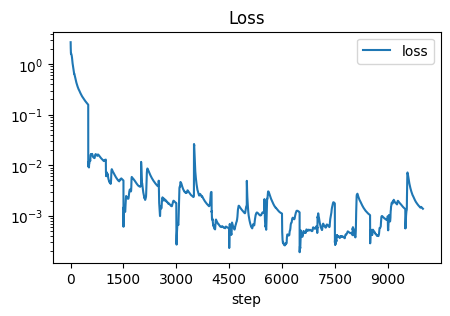

In [118]:
# plot with varying levels of detail
tinstr.plot_train_history(history, show_loss_percentiles=False)
tinstr.plot_train_history(history, show_loss_percentiles=True)
tinstr.plot_train_history(history, per_step=True)

## Oscillations due to Skewed Datasets

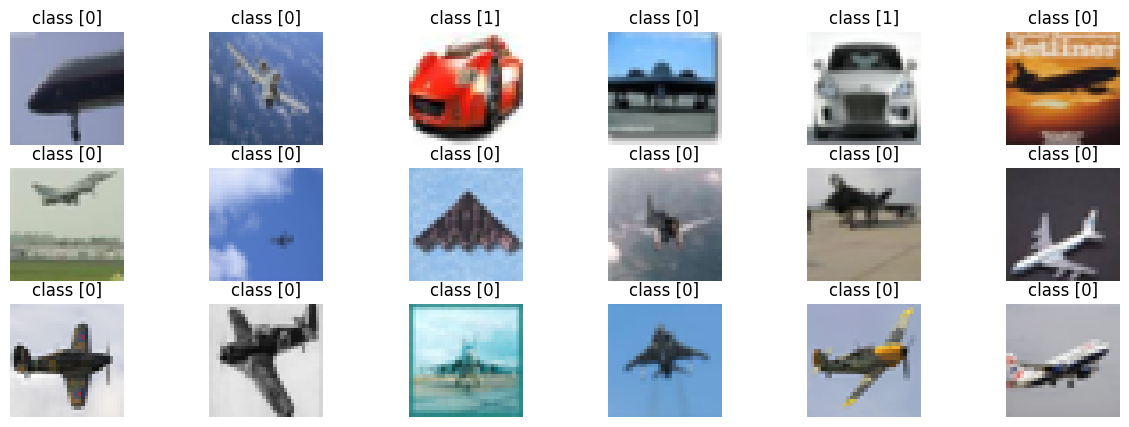

Unskewed:
  75 batches with Class 0: 2400 entries, Class 1: 2400 entries
Skewed:
  75 batches with Class 0: 4367 entries, Class 1: 433 entries


In [92]:
# Load CIFAR-10 dataset
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0

def cifar2_dataset(skewed=False):
  def filter(x, y):
    if y == 0:
      return True
    elif y == 1 and (not skewed or tf.random.uniform((1,))[0] < 0.1):
      # only include 10% of the time if skewed=True
      return True
    else:
      return False # skip all other classes

  tf.keras.utils.set_random_seed(1)
  dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  dataset = dataset.filter(filter).shuffle(buffer_size=1024, seed=1).batch(32)
  dataset = dataset.repeat().take(150) # avoid non-determinism in steps_per_epoch
  return dataset

def show_class_counts(dataset):
  cnt_0 = 0
  cnt_1 = 0
  cnt_b = 0
  for batch in dataset:
    y = batch[1]
    cnt_0 += tf.math.count_nonzero(y == 0).numpy()
    cnt_1 += tf.math.count_nonzero(y == 1).numpy()
    cnt_b += 1
  print(f"  {cnt_b} batches with Class 0: {cnt_0} entries, Class 1: {cnt_1} entries")

# Plot some examples
batch = next(iter(cifar2_dataset(skewed=True)))
plt.figure(figsize=(15,5))
for i in range(18):
    x, y = batch[0][i], batch[1][i]
    plt.subplot(3, 6, i + 1)
    plt.title(f"class {y}")
    plt.imshow(x)
    plt.axis('off')
plt.show()

print(f"Unskewed:")
show_class_counts(cifar2_dataset(skewed=False))
print(f"Skewed:")
show_class_counts(cifar2_dataset(skewed=True))

In [100]:
def classification_model():
    image_input = tf.keras.Input(shape=(32, 32, 3), name="image_input")

    # convolutional layers
    # - 32x32x3 -> 16x16x8 -> 8x8x16 -> 4x4x32 -> 2x2x64
    conv = layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same', name='conv2d_1a')(image_input)
    conv = layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same', name='conv2d_1b')(conv)
    conv = layers.MaxPooling2D(pool_size=2, name='pool2d_1')(conv)
    conv = layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', name='conv2d_2a')(conv)
    conv = layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', name='conv2d_2b')(conv)
    conv = layers.MaxPooling2D(pool_size=2, name='pool2d_2')(conv)
    conv = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', name='conv2d_3a')(conv)
    conv = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', name='conv2d_3b')(conv)
    conv = layers.MaxPooling2D(pool_size=2, name='pool2d_3')(conv)
    conv = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv2d_4a')(conv)
    conv = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv2d_4b')(conv)
    conv = layers.MaxPooling2D(pool_size=2, name='pool2d_4')(conv)

    # dense layers
    # - 2x2x64 -> 256 -> 128 -> 10
    out = layers.Flatten(name='x1_flatten')(conv)
    out = layers.Dense(128, activation='relu', name='x1_dense_1')(out)
    out = layers.Dense(128, activation='relu', name='head_dense1')(out)
    out = layers.Dense(128, activation='relu', name='head_dense2')(out)
    out = layers.Dense(10, activation='linear', name='head_dense3')(out)  # logits output

    return tf.keras.Model(inputs=image_input, outputs=out)

# Uncomment to print model summary
#classification_model().summary()

In [96]:
# unskewed
tf.keras.utils.set_random_seed(1)
model = classification_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
dataset = cifar2_dataset(skewed=False)
history = tinstr.fit(model, dataset, epochs=50, verbose=0, callbacks=[tinstr.LessVerboseProgressLogger(), tinstr.HistoryStats(per_step=True)])

Epoch     5 - 2.37s/epoch: loss: 0.3353  
Epoch    10 - 1.49s/epoch: loss: 0.1438  
Epoch    15 - 1.23s/epoch: loss: 0.0682  
Epoch    20 - 1.49s/epoch: loss: 0.0330  
Epoch    25 - 1.75s/epoch: loss: 0.0257  
Epoch    30 - 1.51s/epoch: loss: 0.0269  
Epoch    35 - 1.48s/epoch: loss: 0.0273  
Epoch    40 - 1.77s/epoch: loss: 0.0160  
Epoch    45 - 1.24s/epoch: loss: 0.0032  
Epoch    50 - 1.48s/epoch: loss: 0.0269  


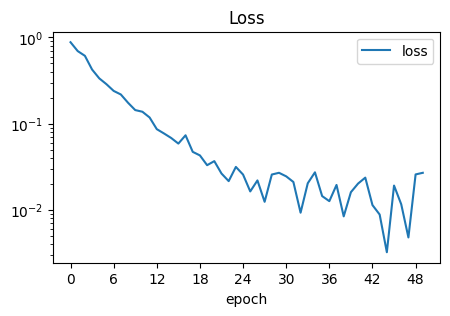

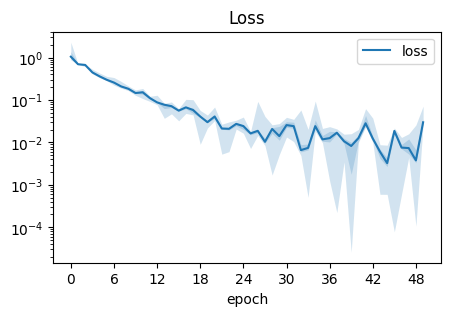

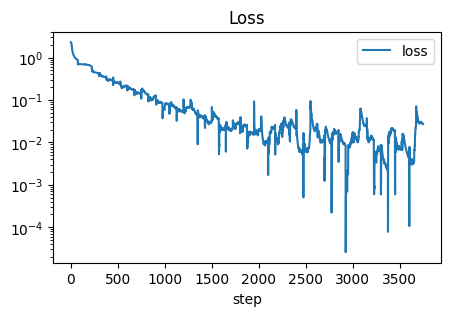

In [97]:
# plot with varying levels of detail
tinstr.plot_train_history(history, show_loss_percentiles=False)
tinstr.plot_train_history(history, show_loss_percentiles=True)
tinstr.plot_train_history(history, per_step=True)

In [98]:
# skewed
tf.keras.utils.set_random_seed(1)
model = classification_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
dataset = cifar2_dataset(skewed=True)
history = tinstr.fit(model, dataset, epochs=50, verbose=0, callbacks=[tinstr.LessVerboseProgressLogger(), tinstr.HistoryStats(per_step=True)])

Epoch     5 - 3.93s/epoch: loss: 0.1830  
Epoch    10 - 2.14s/epoch: loss: 0.1037  
Epoch    15 - 2.07s/epoch: loss: 0.0557  
Epoch    20 - 2.16s/epoch: loss: 0.0368  
Epoch    25 - 2.14s/epoch: loss: 0.0236  
Epoch    30 - 2.17s/epoch: loss: 0.0204  
Epoch    35 - 2.73s/epoch: loss: 0.0192  
Epoch    40 - 2.27s/epoch: loss: 0.0263  
Epoch    45 - 2.17s/epoch: loss: 0.0017  
Epoch    50 - 2.14s/epoch: loss: 0.0108  


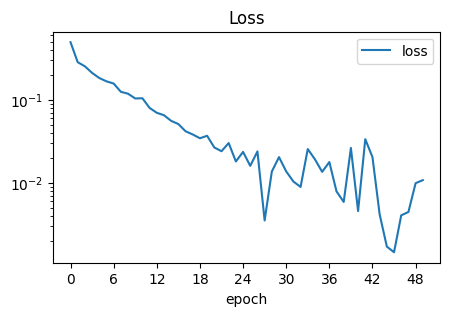

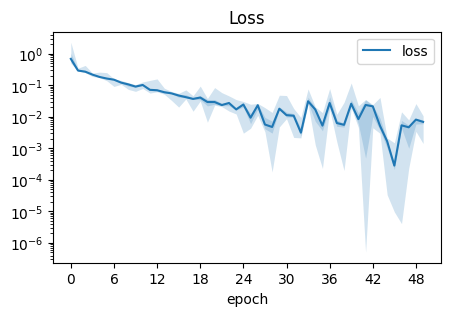

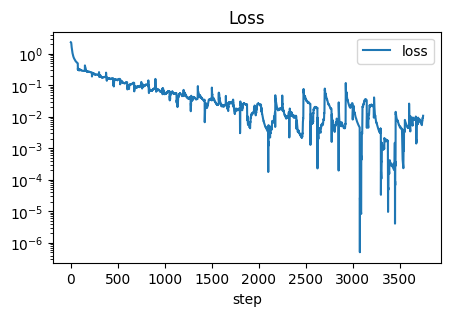

In [99]:
tinstr.plot_train_history(history, show_loss_percentiles=False)
tinstr.plot_train_history(history, show_loss_percentiles=True)
tinstr.plot_train_history(history, per_step=True)